# What is NLP?

Natural Language Processing (NLP) is often taught at the academic level from the perspective of computational linguists. However, as data scientists, we have a richer view of the natural language world - unstructured data that by its very nature has latent information that is important to humans. NLP practioners have benefitted from machine learning techniques to unlock meaning from large corpora, and in this tutorial we’ll explore how to do that using Python, the Natural Language Toolkit (NLTK) and Gensim. 

NLTK is an excellent library for machine-learning based NLP, written in Python by experts from both academia and industry. Python allows you to create rich data applications rapidly, iterating on hypotheses. The combination of Python + NLTK means that you can easily add language-aware data products to your larger analytical workflows and applications. 

## Quick Overview of NLTK
NLTK was written by two eminent computational linguists, Steven Bird (Senior Research Associate of the LDC and professor at the University of Melbourne) and Ewan Klein (Professor of Linguistics at Edinburgh University). The NTLK library provides a combination of natural language corpora, lexical resources, and example grammars with language processing algorithms, methodologies and demonstrations for a very Pythonic "batteries included" view of natural language processing.   

As such, NLTK is perfect for research-driven (hypothesis-driven) workflows for agile data science. 

### Installing NLTK

This notebook has a few dependencies, most of which can be installed via the python package manger - `pip`. 

1. Python 2.7+ or 3.5+ (Anaconda is ok)
2. NLTK
3. The NLTK corpora 
4. The BeautifulSoup library
5. The gensim libary

Once you have Python and pip installed you can install NLTK from the terminal as follows:

```bash
~$ pip install nltk
~$ pip install matplotlib
~$ pip install beautifulsoup4
~$ pip install gensim
```

Note that these will also install Numpy and Scipy if they aren't already installed. 

### What NLTK Includes

- tokenization, stemming, and tagging
- chunking and parsing
- language modeling
- classification and clustering
- logical semantics

NLTK is a useful pedagogical resource for learning NLP with Python and serves as a starting place for producing production grade code that requires natural language analysis. It is also important to understand what NLTK is _not_.

### What NLTK is _Not_

- Production ready out of the box
- Lightweight
- Generally applicable

NLTK provides a variety of tools that can be used to explore the linguistic domain but is not a lightweight dependency that can be easily included in other workflows, especially those that require unit and integration testing or other build processes. This stems from the fact that NLTK includes a lot of added code but also a rich and complete library of corpora that power the built-in algorithms. 

### The Good Parts of NLTK

- Preprocessing
    - segmentation
    - tokenization
    - Part-of-Speech (PoS) tagging
- Word level processing
    - WordNet
    - Lemmatization
    - Stemming
    - NGrams
- Utilities
    - Tree
    - FreqDist
    - ConditionalFreqDist
    - Streaming CorpusReaders
- Classification
    - Maximum Entropy
    - Naive Bayes
    - Decision Tree
- Chunking
- Named Entity Recognition
- Parsers Galore!

### The Bad parts of NLTK

- Syntactic Parsing

    - No included grammar (not a black box)
    - No Feature/Dependency Parsing
    - No included feature grammar

- The sem package
    
    - Toy only (lambda-calculus & first order logic)

- Lots of extra stuff (heavyweight dependency)

    - papers, chat programs, alignments, etc.

Knowing the good and the bad parts will help you explore NLTK further - looking into the source code to extract the material you need, then moving that code to production. We will explore NLTK in more detail in the rest of this notebook. 

## Obtaining and Exploring the NLTK Corpora
NLTK ships with a variety of corpora, let's use a few of them to do some work. To download the NLTK corpora, open a Python interpreter:

```python
import nltk
nltk.download()
```

This will open up a window with which you can download the various corpora and models to a specified location. For now, go ahead and download it all as we will be exploring as much of NLTK as we can. Also take note of the `download_directory` - you're going to want to know where that is so you can get a detailed look at the corpora that's included. I usually export an environment variable to track this. You can do this from your terminal:

    ~$ export NLTK_DATA=/path/to/nltk_data


In [1]:
import nltk
%matplotlib inline
# nltk.download()


In [2]:
# Take a moment to explore what is in this directory
dir(nltk)
# nltk.download

['AbstractLazySequence',
 'AffixTagger',
 'AlignedSent',
 'Alignment',
 'AnnotationTask',
 'ApplicationExpression',
 'Assignment',
 'BigramAssocMeasures',
 'BigramCollocationFinder',
 'BigramTagger',
 'BinaryMaxentFeatureEncoding',
 'BlanklineTokenizer',
 'BllipParser',
 'BottomUpChartParser',
 'BottomUpLeftCornerChartParser',
 'BottomUpProbabilisticChartParser',
 'Boxer',
 'BrillTagger',
 'BrillTaggerTrainer',
 'CFG',
 'CRFTagger',
 'CfgReadingCommand',
 'ChartParser',
 'ChunkParserI',
 'ChunkScore',
 'ClassifierBasedPOSTagger',
 'ClassifierBasedTagger',
 'ClassifierI',
 'ConcordanceIndex',
 'ConditionalExponentialClassifier',
 'ConditionalFreqDist',
 'ConditionalProbDist',
 'ConditionalProbDistI',
 'ConfusionMatrix',
 'ContextIndex',
 'ContextTagger',
 'ContingencyMeasures',
 'CoreNLPDependencyParser',
 'CoreNLPParser',
 'Counter',
 'CrossValidationProbDist',
 'DRS',
 'DecisionTreeClassifier',
 'DefaultTagger',
 'DependencyEvaluator',
 'DependencyGrammar',
 'DependencyGraph',
 'Depen

### Methods for Working with Sample NLTK Corpora

To explore much of the built-in corpus, use the following methods:

In [3]:
# Lists the various corpora and CorpusReader classes in the nltk.corpus module
for name in dir(nltk.corpus):
    print(name)
    if name.islower() and not name.startswith('_'): print(name)

_LazyModule__lazymodule_globals
_LazyModule__lazymodule_import
_LazyModule__lazymodule_init
_LazyModule__lazymodule_loaded
_LazyModule__lazymodule_locals
_LazyModule__lazymodule_name
__class__
__delattr__
__dict__
__dir__
__doc__
__eq__
__format__
__ge__
__getattr__
__getattribute__
__gt__
__hash__
__init__
__init_subclass__
__le__
__lt__
__module__
__name__
__ne__
__new__
__reduce__
__reduce_ex__
__repr__
__setattr__
__sizeof__
__str__
__subclasshook__
__weakref__


In [4]:
# You can explore the titles with: local folder C:\Sara\Anaconda3\Lib\site-packages\nltk
print(nltk.corpus.gutenberg.fileids())

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


In [5]:
# For a specific corpus, list the fileids that are available:
print(nltk.corpus.shakespeare.fileids())

['a_and_c.xml', 'dream.xml', 'hamlet.xml', 'j_caesar.xml', 'macbeth.xml', 'merchant.xml', 'othello.xml', 'r_and_j.xml']


#### `text.Text()`

The `nltk.text.Text` class is a wrapper around a sequence of simple (string) tokens - intended only for _the initial exploration of text_ usually via the Python REPL. It has the following methods:

- common_contexts
- concordance
- collocations
- count
- plot
- findall
- index

You shouldn't use this class in production level systems, but it is useful to explore (small) snippets of text in a meaningful fashion. 

For example, you can get access to the text from Hamlet as follows:

In [6]:
hamlet = nltk.text.Text(nltk.corpus.gutenberg.words('shakespeare-hamlet.txt'))

In [7]:
hamlet.common_contexts("I")

and_am ._thinke thinke_heare ._haue therefore_haue heauen_charge
:_charge ,_might ,_know can_, (_take shall_strike haue_heard t_pray
and_this willingly_came now_must :_do ,_am much_'


#### `concordance()`
The concordance function performs a search for the given token and then also provides the surrounding context.

In [8]:
hamlet.concordance("sister", 55, lines=10)

Displaying 8 of 8 matches:
amlet , Polonius , Laertes , and his Sister Ophelia , Lords Attendant . King . T
our selues . Therefore our sometimes Sister , now our Queene , Th ' imperiall Io
ries are imbark ' t ; Farewell : And Sister , as the Winds giue Benefit , And Co
Feare it Ophelia , feare it my deare Sister , And keepe within the reare of your
 Oh Rose of May , Deere Maid , kinde Sister , sweet Ophelia : Oh Heauens , is ' 
nd so haue I a Noble Father lost , A Sister driuen into desperate tearmes , Who 
ele , So fast they ' l follow : your Sister ' s drown ' d Laertes Laer . Drown '
riest ) A Ministring Angell shall my Sister be , When thou liest howling ? Ham .


#### `similar()`

Given some context surrounding a word, we can discover similar words, e.g. words that that occur frequently in the same context and with a similar distribution: Distributional similarity: 

**Note** `ContextIndex.similar_words(word)` calculates the similarity score for each word as the sum of the products of frequencies in each context. `Text.similar()` simply counts the number of unique contexts the words share.


In [9]:
print(hamlet.similar("marriage"))
austen = nltk.text.Text(nltk.corpus.gutenberg.words("austen-sense.txt"))
print()
print(austen.similar("marriage"))

thee this thankes him againe that it heauen time together which
denmarke life hand ease earth death sea greefe nature
None

mother family life affection time brother side head acquaintance
sister own house daughters feelings conduct mind behaviour arrival
judgment happiness
None


As you can see, this takes a bit of time to build the index in memory, one of the reasons it's not suggested to use this class in production code. 

#### `common_contexts()`

Now that we can do searching and similarity, we find the common contexts of a set of words.

In [10]:
hamlet.common_contexts(["king", "father"])

a_, ,_, my_,


_your turn, go ahead and explore similar words and contexts - what does the common context mean?_

#### `dispersion_plot()`

NLTK also uses matplotlib and pylab to display graphs and charts that can show dispersions and frequency. This is especially interesting for the corpus of innagural addresses given by U.S. presidents.

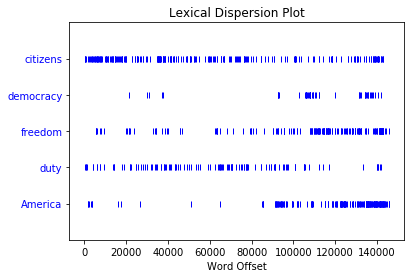

In [11]:
inaugural = nltk.text.Text(nltk.corpus.inaugural.words())
inaugural.dispersion_plot(["citizens", "democracy", "freedom", "duty", "America"])

#### Stopwords

In [12]:
# print(nltk.corpus.stopwords.fileids())
# nltk.corpus.stopwords.words('english')

import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


These corpora export several vital methods:

- paras (iterate through each paragraph)
- sents (iterate through each sentence)
- words (iterate through each word)
- raw   (get access to the raw text)

#### `paras()`

In [13]:
corpus = nltk.corpus.brown
print(corpus.paras())

[[['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.']], [['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.']], ...]


#### `sents()`

In [14]:
print(corpus.sents())

[['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.'], ['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.'], ...]


#### `words()`

In [34]:
print(corpus.words())

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]


#### `raw()`

Be careful!

In [35]:
print(corpus.raw()[:200]) # Be careful!



	The/at Fulton/np-tl County/nn-tl Grand/jj-tl Jury/nn-tl said/vbd Friday/nr an/at investigation/nn of/in Atlanta's/np$ recent/jj primary/nn election/nn produced/vbd ``/`` no/at evidence/nn ''/'' tha


In [50]:
nltk.download('reuters')

[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\Sara\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!


True


## Frequency Analyses 

In statistical machine learning approaches to NLP, the very first thing we need to do is count things - especially the unigrams that appear in the text and their relationships to each other. NLTK provides two excellent classes to enable these frequency analyses:

- `FreqDist`
- `ConditionalFreqDist` 

And these two classes serve as the foundation for most of the probability and statistical analyses that we will conduct.

### Zipf's Law


Zipf's law states that given some corpus of natural language utterances, the frequency of any word is inversely proportional to its rank in the frequency table. Thus the most frequent word will occur approximately twice as often as the second most frequent word, three times as often as the third most frequent word, etc.: the rank-frequency distribution is an inverse relation.


First we will compute the following:

- The count of words
- The vocabulary (unique words)
- The lexical diversity (the ratio of word count to vocabulary)

In [49]:
from nltk.corpus import reuters
reuters = nltk.corpus.gutenberg # Corpus of news articles
reuters.fileids()
# print(reuters.categories())

counts  = nltk.FreqDist(reuters.words())
vocab   = len(counts.keys())
words   = sum(counts.values())
lexdiv  = float(words) / float(vocab)

print("Corpus has %i types and %i tokens for a lexical diversity of %0.3f" % (vocab, words, lexdiv))

Corpus has 51156 types and 2621613 tokens for a lexical diversity of 51.247


#### `most_common()`

The _n_ most common tokens in the corpus

In [51]:
print(counts.most_common(40))

[(',', 186091), ('the', 125748), ('and', 78846), ('.', 73746), ('of', 70078), (':', 47406), ('to', 46443), ('a', 32504), ('in', 31959), ('I', 30221), (';', 27329), ('that', 27289), ('he', 22198), ('his', 20585), ("'", 19873), ('it', 19734), ('was', 18558), ('for', 16860), ('not', 16834), ('with', 16827), ('And', 16533), ('is', 15944), ('be', 15844), ('"', 15422), ('you', 14648), ('as', 13335), ('all', 12965), ('him', 12924), ('they', 11536), ('shall', 11456), ('her', 11153), ('them', 10218), ('had', 10177), ('have', 9900), ('s', 9792), ('my', 9580), ('said', 9410), ('me', 9376), ('but', 9252), ('unto', 8953)]


In [54]:
# print(counts.max())

The most frequent token in the corpus.

SyntaxError: invalid syntax (<ipython-input-54-6a60f8b67dd8>, line 3)

In [55]:
print(counts.max())

,


#### `counts.hapaxes()`

A list of all _hapax legomena_ (words that only appear one time in the corpus).

In [56]:
print(counts.hapaxes()[0:10])

['1816', 'valetudinarian', 'Matrimony', 'curtseys', 'bangs', 'Dirty', 'drizzle', 'Mitchell', 'Success', 'dissuaded']


#### `counts.freq()`

The percentage of the corpus for the given token.

In [57]:
counts.freq('stipulate') * 100 

7.628891068208771e-05

#### `counts.plot()`

Plot the frequencies of the _n_ most commonly occuring words.

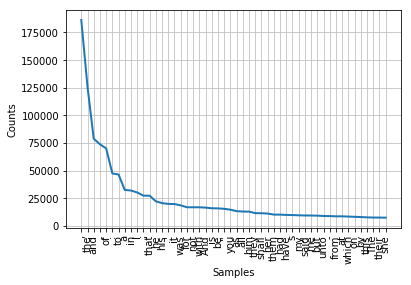

In [58]:
counts.plot(50, cumulative=False)

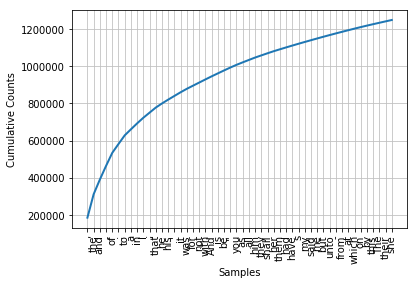

In [59]:
# By setting cumulative to True, we can visualize the cumulative counts of the _n_ most common words.
counts.plot(50, cumulative=True)

#### `ConditionalFreqDist()`

In [60]:
from itertools import chain 

brown = nltk.corpus.brown
categories = brown.categories()

counts = nltk.ConditionalFreqDist(chain(*[[(cat, word) for word in brown.words(categories=cat)] for cat in categories]))

for category, dist in counts.items():
    vocab  = len(dist.keys())
    tokens = sum(dist.values())
    lexdiv = float(tokens) / float(vocab)
    print("%s: %i types with %i tokens and lexical diversity of %0.3f" % (category, vocab, tokens, lexdiv))

adventure: 8874 types with 69342 tokens and lexical diversity of 7.814
belles_lettres: 18421 types with 173096 tokens and lexical diversity of 9.397
editorial: 9890 types with 61604 tokens and lexical diversity of 6.229
fiction: 9302 types with 68488 tokens and lexical diversity of 7.363
government: 8181 types with 70117 tokens and lexical diversity of 8.571
hobbies: 11935 types with 82345 tokens and lexical diversity of 6.899
humor: 5017 types with 21695 tokens and lexical diversity of 4.324
learned: 16859 types with 181888 tokens and lexical diversity of 10.789
lore: 14503 types with 110299 tokens and lexical diversity of 7.605
mystery: 6982 types with 57169 tokens and lexical diversity of 8.188
news: 14394 types with 100554 tokens and lexical diversity of 6.986
religion: 6373 types with 39399 tokens and lexical diversity of 6.182
reviews: 8626 types with 40704 tokens and lexical diversity of 4.719
romance: 8452 types with 70022 tokens and lexical diversity of 8.285
science_fiction: 

In [ ]:
for ngram in nltk.ngrams(["The", "bear", "walked", "in", "the", "woods", "at", "midnight"], 5):
    print(ngram)

    

## Preprocessing Text

NLTK is great at the preprocessing of raw text - it provides the following tools for dividing text into it's constituent parts:
<a id='tokenize'></a>
<a id='segment'></a>
- `sent_tokenize`: a Punkt sentence tokenizer:

    This tokenizer divides a text into a list of sentences, by using an unsupervised algorithm to build a model for abbreviation words, collocations, and words that start sentences.  It must be trained on a large collection of plaintext in the target language before it can be used.
    
    However, Punkt is designed to learn parameters (a list of abbreviations, etc.) unsupervised from a corpus similar to the target domain. The pre-packaged models may therefore be unsuitable: use PunktSentenceTokenizer(text) to learn parameters from the given text.
    
    
- `word_tokenize`: a Treebank tokenizer 

    The Treebank tokenizer uses regular expressions to tokenize text as in Penn Treebank. This is the method that is invoked by ``word_tokenize()``.  It assumes that the text has already been segmented into sentences, e.g. using ``sent_tokenize()``.
    
<a id='pos'></a>
- `pos_tag`: a maximum entropy tagger trained on the Penn Treebank

    There are several other taggers including (notably) the BrillTagger as well as the BrillTrainer to train your own tagger or tagset. 

In [61]:
text = u"Medical personnel returning to New York and New Jersey from the Ebola-riddled countries in West Africa will be automatically quarantined if they had direct contact with an infected person, officials announced Friday. New York Gov. Andrew Cuomo (D) and New Jersey Gov. Chris Christie (R) announced the decision at a joint news conference Friday at 7 World Trade Center. “We have to do more,” Cuomo said. “It’s too serious of a situation to leave it to the honor system of compliance.” They said that public-health officials at John F. Kennedy and Newark Liberty international airports, where enhanced screening for Ebola is taking place, would make the determination on who would be quarantined. Anyone who had direct contact with an Ebola patient in Liberia, Sierra Leone or Guinea will be quarantined. In addition, anyone who traveled there but had no such contact would be actively monitored and possibly quarantined, authorities said. This news came a day after a doctor who had treated Ebola patients in Guinea was diagnosed in Manhattan, becoming the fourth person diagnosed with the virus in the United States and the first outside of Dallas. And the decision came not long after a health-care worker who had treated Ebola patients arrived at Newark, one of five airports where people traveling from West Africa to the United States are encountering the stricter screening rules."

for sent in nltk.sent_tokenize(text): 
    print(sent)
    print()


Medical personnel returning to New York and New Jersey from the Ebola-riddled countries in West Africa will be automatically quarantined if they had direct contact with an infected person, officials announced Friday.

New York Gov.

Andrew Cuomo (D) and New Jersey Gov.

Chris Christie (R) announced the decision at a joint news conference Friday at 7 World Trade Center.

“We have to do more,” Cuomo said.

“It’s too serious of a situation to leave it to the honor system of compliance.” They said that public-health officials at John F. Kennedy and Newark Liberty international airports, where enhanced screening for Ebola is taking place, would make the determination on who would be quarantined.

Anyone who had direct contact with an Ebola patient in Liberia, Sierra Leone or Guinea will be quarantined.

In addition, anyone who traveled there but had no such contact would be actively monitored and possibly quarantined, authorities said.

This news came a day after a doctor who had treated Eb

In [62]:
for sent in nltk.sent_tokenize(text):
    print(list(nltk.wordpunct_tokenize(sent)))
    print()

['Medical', 'personnel', 'returning', 'to', 'New', 'York', 'and', 'New', 'Jersey', 'from', 'the', 'Ebola', '-', 'riddled', 'countries', 'in', 'West', 'Africa', 'will', 'be', 'automatically', 'quarantined', 'if', 'they', 'had', 'direct', 'contact', 'with', 'an', 'infected', 'person', ',', 'officials', 'announced', 'Friday', '.']

['New', 'York', 'Gov', '.']

['Andrew', 'Cuomo', '(', 'D', ')', 'and', 'New', 'Jersey', 'Gov', '.']

['Chris', 'Christie', '(', 'R', ')', 'announced', 'the', 'decision', 'at', 'a', 'joint', 'news', 'conference', 'Friday', 'at', '7', 'World', 'Trade', 'Center', '.']

['“', 'We', 'have', 'to', 'do', 'more', ',”', 'Cuomo', 'said', '.']

['“', 'It', '’', 's', 'too', 'serious', 'of', 'a', 'situation', 'to', 'leave', 'it', 'to', 'the', 'honor', 'system', 'of', 'compliance', '.”', 'They', 'said', 'that', 'public', '-', 'health', 'officials', 'at', 'John', 'F', '.', 'Kennedy', 'and', 'Newark', 'Liberty', 'international', 'airports', ',', 'where', 'enhanced', 'screening

In [63]:
for sent in nltk.sent_tokenize(text):
    print(list(nltk.pos_tag(nltk.word_tokenize(sent))))
    print()

[('Medical', 'JJ'), ('personnel', 'NNS'), ('returning', 'VBG'), ('to', 'TO'), ('New', 'NNP'), ('York', 'NNP'), ('and', 'CC'), ('New', 'NNP'), ('Jersey', 'NNP'), ('from', 'IN'), ('the', 'DT'), ('Ebola-riddled', 'JJ'), ('countries', 'NNS'), ('in', 'IN'), ('West', 'NNP'), ('Africa', 'NNP'), ('will', 'MD'), ('be', 'VB'), ('automatically', 'RB'), ('quarantined', 'VBN'), ('if', 'IN'), ('they', 'PRP'), ('had', 'VBD'), ('direct', 'JJ'), ('contact', 'NN'), ('with', 'IN'), ('an', 'DT'), ('infected', 'JJ'), ('person', 'NN'), (',', ','), ('officials', 'NNS'), ('announced', 'VBD'), ('Friday', 'NNP'), ('.', '.')]

[('New', 'NNP'), ('York', 'NNP'), ('Gov', 'NNP'), ('.', '.')]

[('Andrew', 'NNP'), ('Cuomo', 'NNP'), ('(', '('), ('D', 'NNP'), (')', ')'), ('and', 'CC'), ('New', 'NNP'), ('Jersey', 'NNP'), ('Gov', 'NNP'), ('.', '.')]

[('Chris', 'NNP'), ('Christie', 'NNP'), ('(', '('), ('R', 'NNP'), (')', ')'), ('announced', 'VBD'), ('the', 'DT'), ('decision', 'NN'), ('at', 'IN'), ('a', 'DT'), ('joint', 'J

In [64]:
All of these taggers work _pretty_ well - but you can (and should train them on your own corpora). 

<a id='lemmatize'></a>
## Stemming and Lemmatization

We have an immense number of word forms as you can see from our various counts in the `FreqDist` above - it is helpful for many applications to normalize these word forms (especially applications like search) into some canonical word for further exploration. In English (and many other languages) - morphological context indicate gender, tense, quantity, etc. but these sublties might not be necessary:

<a id='stemming'></a>
Stemming = chop off affixes to get the root stem of the word:

    running --> run
    flowers --> flower
    geese   --> geese 
    
Lemmatization = look up word form in a lexicon to get canonical lemma

    women   --> woman
    foxes   --> fox
    sheep   --> sheep
    
There are several stemmers available:

    - Lancaster (English, newer and aggressive)
    - Porter (English, original stemmer)
    - Snowball (Many languages, newest)
    
<a id='wordnet'></a>    
The Lemmatizer uses the WordNet lexicon
    

SyntaxError: invalid syntax (<ipython-input-64-5391fe6bda7c>, line 1)

In [65]:
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import PorterStemmer

text = list(nltk.word_tokenize("The women running in the fog passed bunnies working as computer scientists."))

snowball = SnowballStemmer('english')
lancaster = LancasterStemmer()
porter = PorterStemmer()

for stemmer in (snowball, lancaster, porter):
    stemmed_text = [stemmer.stem(t) for t in text]
    print(" ".join(stemmed_text))

the women run in the fog pass bunni work as comput scientist .
the wom run in the fog pass bunny work as comput sci .
the women run in the fog pass bunni work as comput scientist .


In [66]:
from nltk.stem.wordnet import WordNetLemmatizer

# Note: use part of speech tag, we'll see this in machine learning! 
lemmatizer = WordNetLemmatizer()
lemmas = [lemmatizer.lemmatize(t) for t in text]
print(" ".join(lemmas))

The woman running in the fog passed bunny working a computer scientist .


Note that the lemmatizer has to load the WordNet corpus which takes a bit.

Typical normalization of text for use as features in machine learning models looks something like this:

In [67]:
import string
from nltk.corpus import wordnet as wn

## Module constants
lemmatizer  = WordNetLemmatizer()
stopwords   = set(nltk.corpus.stopwords.words('english'))
punctuation = string.punctuation

def tagwn(tag):
    """
    Returns the WordNet tag from the Penn Treebank tag.
    """

    return {
        'N': wn.NOUN,
        'V': wn.VERB,
        'R': wn.ADV,
        'J': wn.ADJ
    }.get(tag[0], wn.NOUN)


def normalize(text):
    for token, tag in nltk.pos_tag(nltk.wordpunct_tokenize(text)):
        #if you're going to do part of speech tagging, do it here
        token = token.lower()
        if token in stopwords and token in punctuation:
            continue
        token = lemmatizer.lemmatize(token, tagwn(tag))
        yield token

print(list(normalize("The eagle flies at midnight.")))

['the', 'eagle', 'fly', 'at', 'midnight', '.']


<a id='nerc'></a>
## Named Entity Recognition

NLTK has an excellent MaxEnt backed Named Entity Recognizer that is trained on the Penn Treebank. You can also retrain the chunker if you'd like - the code is very readable to extend it with a Gazette or otherwise.

<a id='chunk'></a>

In [ ]:
print(nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize("John Smith is from the United States of America and works at Microsoft Research Labs"))))

## Parsing 

Parsing is a difficult NLP task due to structural ambiguities in text. As the length of sentences increases, so does the number of possible trees. 

In [68]:
for name in dir(nltk.parse):
    if not name.startswith('_'): print(name)

BllipParser
BottomUpChartParser
BottomUpLeftCornerChartParser
BottomUpProbabilisticChartParser
ChartParser
CoreNLPDependencyParser
CoreNLPParser
DependencyEvaluator
DependencyGraph
EarleyChartParser
FeatureBottomUpChartParser
FeatureBottomUpLeftCornerChartParser
FeatureChartParser
FeatureEarleyChartParser
FeatureIncrementalBottomUpChartParser
FeatureIncrementalBottomUpLeftCornerChartParser
FeatureIncrementalChartParser
FeatureIncrementalTopDownChartParser
FeatureTopDownChartParser
IncrementalBottomUpChartParser
IncrementalBottomUpLeftCornerChartParser
IncrementalChartParser
IncrementalLeftCornerChartParser
IncrementalTopDownChartParser
InsideChartParser
LeftCornerChartParser
LongestChartParser
MaltParser
NaiveBayesDependencyScorer
NonprojectiveDependencyParser
ParserI
ProbabilisticNonprojectiveParser
ProbabilisticProjectiveDependencyParser
ProjectiveDependencyParser
RandomChartParser
RecursiveDescentParser
ShiftReduceParser
SteppingChartParser
SteppingRecursiveDescentParser
SteppingShi

Similar to how you might write a compiler or an interpreter; parsing starts with a grammar that defines the construction of phrases and terminal entities. 

In [69]:
grammar = nltk.grammar.CFG.fromstring("""

S -> NP PUNCT | NP
NP -> N N | ADJP NP | DET N | DET ADJP
ADJP -> ADJ NP | ADJ N

DET -> 'an' | 'the' | 'a' | 'that'
N -> 'airplane' | 'runway' | 'lawn' | 'chair' | 'person' 
ADJ -> 'red' | 'slow' | 'tired' | 'long'
PUNCT -> '.'
""")

In [70]:
def parse(sent):
    sent = sent.lower()
    parser = nltk.parse.ChartParser(grammar)
    for p in parser.parse(nltk.word_tokenize(sent)):
        yield p 

        
for tree in parse("the long runway"): 
    tree.pprint()
    tree[0].draw()

(S (NP (DET the) (ADJP (ADJ long) (N runway))))
